# Medicina Inteligente: atravesando fronteras con Inteligencia Artificial

Después de este taller los participantes serán capaces de:
* Diferenciar entre *Machine Learning* y *Deep Learning*
* Implementar modelos sencillos de *machine learning*
* Responder la pregunta: ¿cuáles son las principales diferencias entre el aprendizaje supervisado y el aprendizaje no supervisado en *machine learning*?

## ¿Qué es el Machine Learning y el Deep Learning?

El **aprendizaje automático** (*machine learning*, ML) es un área de las ciencias computacionales que busca simular el proceso de aprendizaje humano mediante la exploración de datos y una optimización continua para mejorar el rendimiento de tareas específicas.

El **aprendizaje profundo** (*deep learning*, DL) es una sub-área del aprendizaje automático que simula la propagación de información en el cerebro por medio de *redes neuronales*. Estas se organizan en capas, que se posicionan una después de otra, de forma que aumentan en *profundidad*.

<figure>
<img    src="images/IA_ML_DL.png"
        width=500
        height=500>
<figcaption>Fig. 1: Organización de los campos de inteligencia artifical, aprendizaje automático, y aprendizaje profundo.
</figure>

## Algunos ejemplos de ML y DL en la vida diaria

* Alexa
* Google Maps
* Netflix
* Google Traductor
* Teclado del celular
* **ChatGPT**

## Pasos para la implementación de algoritmos de ML y DL

1. Entender el problema
2. Adquisición y/o búsqueda de datos
3. Pre-procesamiento de datos
4. Extracción de características
5. Elección de modelo o arquitectura
6. Entrenamiento del modelo
7. Evaluación del modelo
8. Despliegue del modelo (en aplicaciones prácticas e industriales)

<figure>
<img    src="images/ml_workflow.png"
        width=1200
        height=200>
<figcaption>Fig. 2: Flujo de trabajo convencional en el uso de herramientas de ML en aplicaciones biomédicas (Angermueller, et al., 2016).
</figure>

# Importación del conjunto de datos
Los datos que utilizaremos a continuación están disponibles de manera libre en la página de [Kaggle](https://www.kaggle.com/code/ptonile/breast-cancer-classification/notebook), así como múltiples porciones de código aquí utilizadas (Elkomy, A., 2024).

Se trata de un conjunto de datos de pacientes con cáncer de pulmón, en donde las etiquetas "**M**" y "**B**" representan si el registro correspondiente corresponde a uno "Benigno", o "Maligno" (canceroso).
El que utilizaremos para este taller está disponible en [esta carpeta de drive](https://drive.google.com/drive/folders/1jPPIVLn2F5BamUIYhSIwDe090O1evMEf?usp=drive_link). El procedimiento de cómo acceder al conjunto de datos se muestra a continuación.

Al hacer click en el enlace, se abrirá el navegador de internet en una dirección de una carpeta almacenada en Google Drive. A continuación, dar click en la parte superior con el texto ***sequence_classification_dataset***. Seleccionar el apartado ***Organizar***, y finalmente ***Añadir acceso directo***.

<figure>
<img    src="images/drive_1.png"
        width=1100
        height=600>
<figcaption>Fig. 3: Ilustración de pasos a seguir para añadir acceso directo del conjunto de datos a la unidad de Google Drive (1).
</figure>


Después se abrirá una pequeña ventana para indicar la dirección donde el acceso directo al conjunto de datos será puesto dentro de la unidad. Seleccionar ***Mi unidad*** y ***Añadir***.

<figure>
<img    src="images/drive_2.png"
        width=600
        height=500>
<figcaption>Fig. 4: Ilustración de pasos a seguir para añadir acceso directo del conjunto de datos a la unidad de Google Drive (2).
</figure>

## Importación de librerías

Las **librerías** o **módulos** son básicamente código que alguien más ya escribió y se lanzó para su uso libre. En este caso nosotros utilizaremos los **módulos** relacionados con inteligencia artificial, aprendizaje automático, y aprendizaje profundo.

In [ ]:
# Importar datos de unidad de google drive
from google.colab import drive
drive.mount('/content/drive')

In [1]:
# Pytorch para redes neuronales
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
from torch.utils.data import DataLoader, random_split
from torch.utils.data import DataLoader
from torchvision.models import resnet18
from torchvision.datasets import ImageFolder
from torchvision.utils import make_grid
import torchvision.transforms.functional as F

# Librerías para manejo de datos y álgebra lineal
import numpy as np
import pandas as pd

# matplotlib y seaborn para graficar resultados
import matplotlib.pyplot as plt
import seaborn as sns

# Librerías para modelado de datos, métricas, y funciones útiles
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import StackingClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.tree import plot_tree

## Carga y pre-procesamiento de datos

### ¿Qué ven ustedes?
<figure>
<img    src="images/Malignant_lung_cancer.jpg"
        width=512
        height=512>
<figcaption>Fig. 5: Imagen de CT, plano axial (Al-Yasriy, H., 2020).
</figure>

#### Nosotros podemos ver claramente una masa anormal del lado derecho de la imagen, sin embargo, ¿cómo puede saber la computadora que existe una masa anormal como la que nosotros fácilmente identificamos?

## Ejemplo con datos en formato de tabla de cáncer de mama
Conjunto de datos recuperado de [Kaggle](https://www.kaggle.com/datasets/imtkaggleteam/breast-cancer) (Wolberg, W., *et al*. 2024).

Cada una de las columnas retrata una característica de cada muestra presente en el conjunto de datos. 
* Radio (media de las distancias del centro a algún punto en el perímetro)
* Textura (desviación estándar de valores en escala de grises)
* Perímetro
* Área
* Suavidad (variación de longitudes del radio)
* Compacidad ($\frac{perímetro^2}{área -1}$)
* Concavidad (porciones cóncavas en el contorno)
* Puntos cóncavos (número de porciones cóncavas en el controno)
* Simetría
* Dimensión fractal (qué tanto parece llenar un espacio circular)

In [2]:
#breast_cancer_df = pd.read_csv("/content/drive/MyDrive/dataset/breast_cancer/breast-cancer-wisconsin-data.csv")
breast_cancer_df = pd.read_csv("breast_cancer/breast-cancer-wisconsin-data.csv")
breast_cancer_df.drop(columns=["id", "Unnamed: 32"], inplace=True)
breast_cancer_df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


### Exploración de los datos

In [3]:
breast_cancer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

### Visualización de los datos

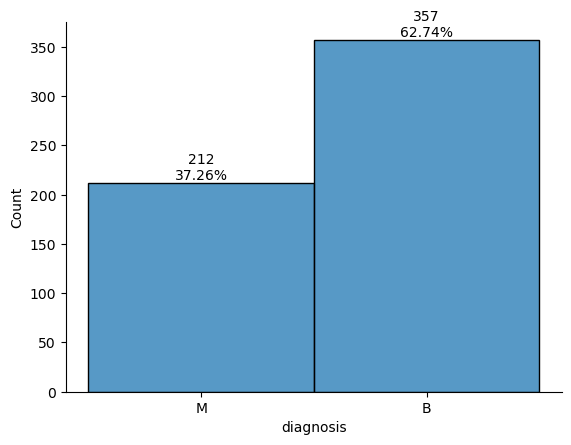

In [4]:
sns.histplot(data=breast_cancer_df, x='diagnosis')
for i, bar in enumerate(plt.gca().patches):
    counts = bar.get_height()
    percent = f'{round(counts / breast_cancer_df.shape[0] * 100, 2)}%'
    text = f'{counts}\n{percent}'
    plt.gca().text(bar.get_x() + bar.get_width() / 2, bar.get_height(), text, ha='center', va='bottom')
sns.despine()
plt.show()

### Estandarización y codificación

In [5]:
scaler = StandardScaler().set_output(transform='pandas')
df_num = breast_cancer_df.drop(columns = 'diagnosis').copy()
df_num = scaler.fit_transform(df_num)

### Graficar distribución de datos y variables

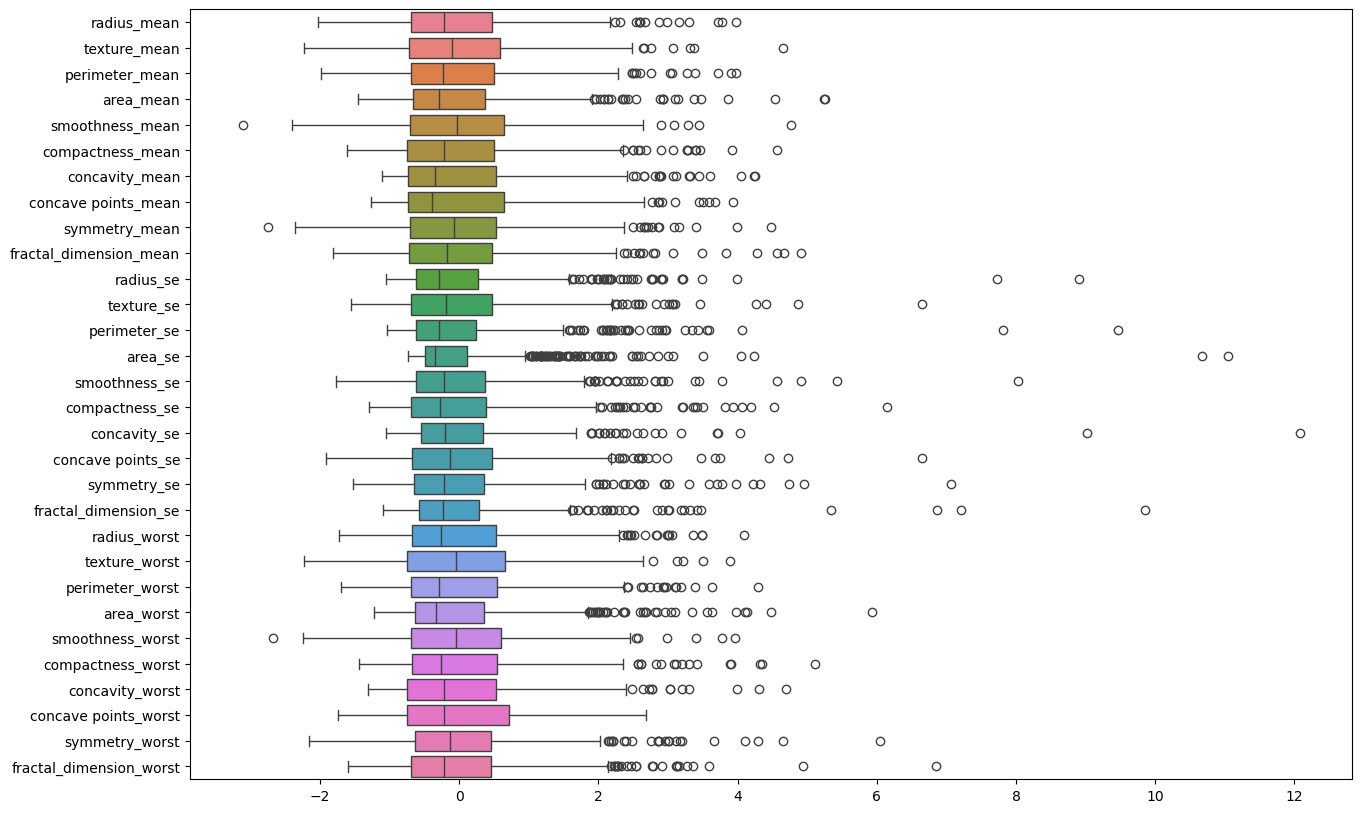

In [6]:
# Plot distrubtion of numerical variables again
plt.figure(figsize=(15, 10))
sns.boxplot(data=df_num, orient = 'h')
plt.show()

### Asignación de etiquetas y división de conjuntos de datos

In [8]:
X = df_num.copy()
y = breast_cancer_df[['diagnosis']].copy()

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.20, random_state=42)

## Métodos de Machine Learning

### Regresión lineal y logística
---
La **regresión lineal**, es un algoritmo es utilizado para predecir valores continuos encontrando la mejor linea de ajuste para los datos de salida. Expresado formalmente: $$y = mx + b$$   

*   **Parámetros**: $m$ y $b$ (valores inicialmente aleatorios).
*   **Cálculo de la función de costo**: Para evaluar que tan bien se ajusta la linea a los datos (*error cuadrático medio*).

La **regresión logística** se usa para clasificaciones binarias (o sea dos conjuntos de datos) buscando la propabilidad de pertenencia a una clase.

*   Se utiliza la función sigmoide para el calculo de probabilidad.
*   Parámetros: $m$ y $b$
*   **Función de costo**: Evalua la eficacia de la predicción (*entropia cruzada*).
*   Optimización de parámetros: Minimiza la función de costo (*gradiente descendente*)

<figure>
<img src="images/logistic_regression.png" 
        alt="Imagen de ejemplo" width=500, height=315>
<figcaption> Fig. 7: Representación de una clasificación binaria mediante regresión logística.
</figure>

#### Ejemplo de regresión logística

In [9]:
# Construcción de un modelo de regresión logística y ajustarlo a los datos
logreg = LogisticRegression(random_state=42).fit(X_train, y_train)

/Users/msr/miniconda3/envs/pytorch/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [10]:
# Usar el modelo de regresión logística para obtener predicciones en el conjunto de prueba
logreg_y_pred = logreg.predict(X_test)

##### Evaluación del modelo de regresión logística

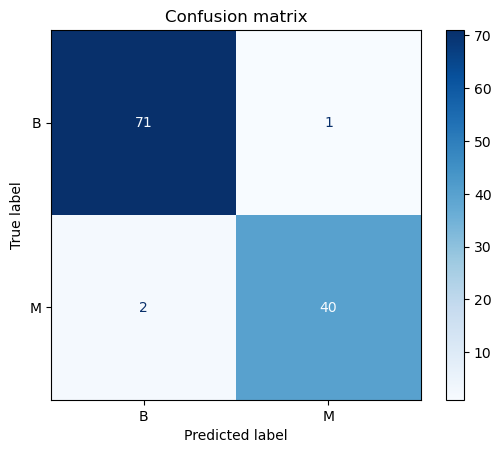

In [11]:
# Calcular la matriz de confusión para evaluar el rendimiento del modelo
log_cm = confusion_matrix(y_test, logreg_y_pred, labels=logreg.classes_)

# Crear arreglo de la matriz de confusión
log_disp = ConfusionMatrixDisplay(confusion_matrix=log_cm,
                                  display_labels=logreg.classes_)

# Gráficar la matriz de confusión
log_disp.plot(values_format='', cmap="Blues")
plt.title("Confusion matrix")
plt.show()

In [12]:
# Crear un reporte de la clasificación del modelo de regresión logística
target_names = ['Predicted Benign', 'Predicted Maglinant']
print(classification_report(y_test, logreg_y_pred, target_names=target_names))

                     precision    recall  f1-score   support

   Predicted Benign       0.97      0.99      0.98        72
Predicted Maglinant       0.98      0.95      0.96        42

           accuracy                           0.97       114
          macro avg       0.97      0.97      0.97       114
       weighted avg       0.97      0.97      0.97       114



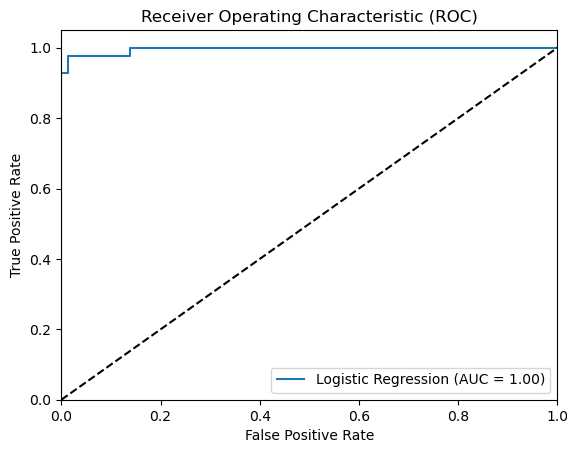

In [13]:
# Graficar curva ROC del rendimiento del modelo de regresión logística

log_probs = logreg.predict_proba(X_test)[:, 1]
log_fpr, log_tpr, _ = roc_curve(y_test, log_probs, pos_label="M")
log_auc = roc_auc_score(y_test, log_probs)

plt.plot(log_fpr, log_tpr, label='Logistic Regression (AUC = %0.2f)' % log_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

### Máquinas de soporte de vectores (*Support Vector Machines*)
---
Son un tipo de algoritmo de **aprendizaje supervisado**, estos manejan conjuntos de datos de alta dimensionalidad. Cararacterizado por ser un excelente clasificador.


*   Busca encontrar un **hiperplano que maximice** el margen de discriminación entre las clases de datos en un espacio de características.
*   Utiliza la función ***hinge loss*** para penalizar las clasificaciones incorrectas.
*   Usa como **hiperparámetro** *C*, que es el costo.
*   Si *C* es muy grande elegirá un margen estricto, si es pequeño se optimizará el margen incluso si el hiperplano clasifica mal.

<figure>
<img src="images/SVM in R.png" width=500, height=415>
<figcaption> Fig. 8: Representación gráfica de una máquina de soporte de vectores.
</figure>

#### Ejemplo de máquina de soporte de vectores

In [14]:
# Construir el modelo y ajustarlo a los datos de entrenamiento
svc_model = SVC(probability=True).fit(X_train, y_train)

# Utilizar el modelo para generar predicciones en el conjunto de datos de prueba
svc_y_pred = svc_model.predict(X_test)

/Users/msr/miniconda3/envs/pytorch/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


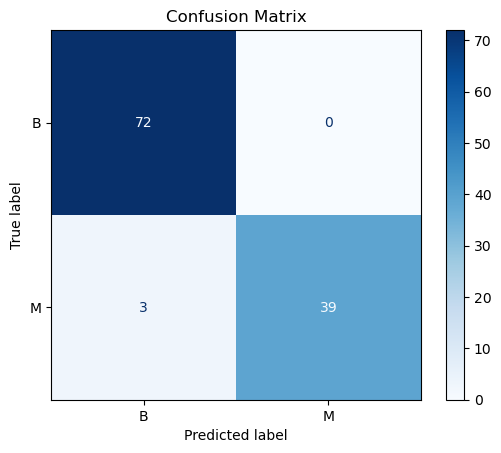

In [15]:
# Cálculo de la matriz de confusión
svc_cm = confusion_matrix(y_test, svc_y_pred, labels=svc_model.classes_)

# Crear estructura de la matriz de confusión
svc_disp = ConfusionMatrixDisplay(confusion_matrix=svc_cm,
                                  display_labels=svc_model.classes_)

# Graficar matriz de confusión
svc_disp.plot(values_format='', cmap="Blues")
plt.title("Confusion Matrix")
plt.show()

In [16]:
# Crear un reporte de clasificación del modelo de SVM
print(classification_report(y_test, svc_y_pred, target_names=target_names))

                     precision    recall  f1-score   support

   Predicted Benign       0.96      1.00      0.98        72
Predicted Maglinant       1.00      0.93      0.96        42

           accuracy                           0.97       114
          macro avg       0.98      0.96      0.97       114
       weighted avg       0.97      0.97      0.97       114



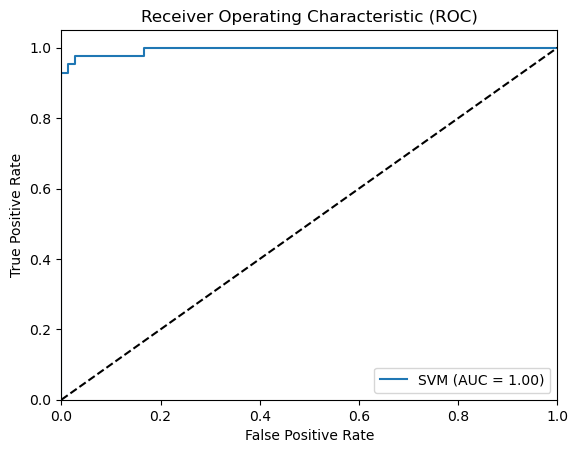

In [17]:
# Calcular curva ROC del modelo de SVM
svc_probs = svc_model.predict_proba(X_test)[:, 1]
svc_fpr, svc_tpr, _ = roc_curve(y_test, svc_probs, pos_label="M")
svc_auc = roc_auc_score(y_test, svc_probs)

# Graficar curva ROC
plt.plot(svc_fpr, svc_tpr, label='SVM (AUC = %0.2f)' % svc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

### Random Forest

Es otro algoritmo de aprendizaje supervisado que combina multiples **árboles de desición**, cada uno entrenado por separado con diferentes datos.
Basado en lógica binaria multivariante.

*   Utiliza **bagging** que es una técnica de ensamblaje, genera múltiples conjuntos de datos de la base de datos original.
*   Para cada conjunto, se construye un árbol, con un subconjunto de **características** para cada uno.

Para cada predicción, cada árbol realiza una propia y, dependiendo del algoritmo (si es de clasificación o regresión), la predicción final se dará por votación o promedio.

<figure>
<img src="images/how-random-forest-classifier-work.png" width=600, height=400>
<figcaption> Fig. 9: Ilustración representativa de un modelo de *random forest*.
</figure>

##### Ejemplo con random forest

In [18]:
# Construir un random forest y ajustarlo de acuerdo a los datos de entrenamiento
rf_model = RandomForestClassifier(random_state=42).fit(X_train, y_train)

# Utilizar el modelo para realizar predicciones para el conjunto de datos de prueba
rf_y_pred = rf_model.predict(X_test)

/Users/msr/miniconda3/envs/pytorch/lib/python3.11/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


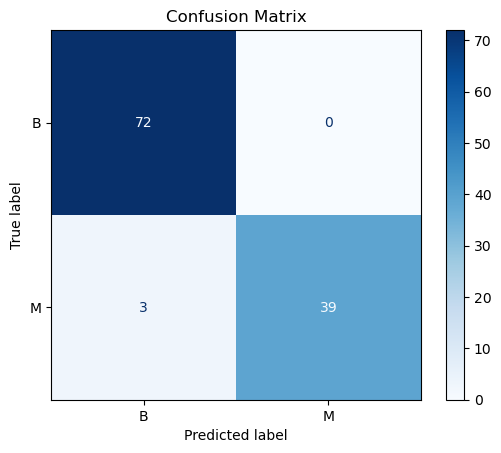

In [19]:
# Calcular matriz de confusión
rf_cm = confusion_matrix(y_test, rf_y_pred, labels=rf_model.classes_)
rf_disp = ConfusionMatrixDisplay(confusion_matrix=rf_cm,
                                  display_labels=rf_model.classes_)

# Graficar matriz de confusión
rf_disp.plot(values_format='', cmap="Blues")
plt.title("Confusion Matrix")
plt.show()

In [20]:
# Crear un reporte de clasificación del modelo de Random Forest
print(classification_report(y_test, rf_y_pred, target_names=target_names))

                     precision    recall  f1-score   support

   Predicted Benign       0.96      1.00      0.98        72
Predicted Maglinant       1.00      0.93      0.96        42

           accuracy                           0.97       114
          macro avg       0.98      0.96      0.97       114
       weighted avg       0.97      0.97      0.97       114



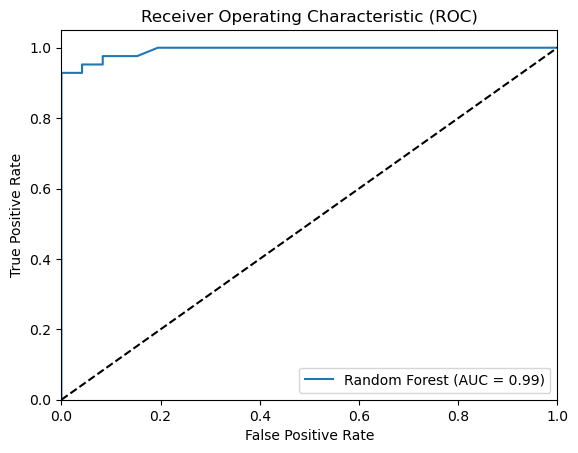

In [21]:
# Calcular curva ROC del Random Forest
rf_probs = rf_model.predict_proba(X_test)[:, 1]
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_probs, pos_label="M")
rf_auc = roc_auc_score(y_test, rf_probs)

# Graficar curva ROC
plt.plot(rf_fpr, rf_tpr, label='Random Forest (AUC = %0.2f)' % rf_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

## Arquitecturas de Deep Learning
---

### Pre-procesamiento de datos
En las siguientes celdas visualizaremos los datos con los que trabajaremos para la explicación y demostración de 3 arquitecturas de aprendizaje profundo.

Los datos se conforman de distintas imágenes de resonancia magnética de 4 tipos:
* Sin tumor
* Glioma
* Meningioma
* Pituitary

El dataset está publicado para su libre acceso en [Kaggle](https://www.kaggle.com/datasets/masoudnickparvar/brain-tumor-mri-dataset).

In [2]:
# Definir el dispositivo de entrenamiento
# Get cpu, gpu or mps device for training.
device = (
    "cuda"
    if torch.cuda.is_available()
    else "mps"
    if torch.backends.mps.is_available()
    else "cpu"
)
print(f"Utilizando dispositivo: {device}")

Utilizando dispositivo: mps


In [3]:
# Pre-procesamiento de los datos
data_transforms = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(10),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

train_dataset = ImageFolder('brain_tumor_MRI_dataset/Training', transform=data_transforms)
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)

val_dataset = ImageFolder('brain_tumor_MRI_dataset/Testing', transform=data_transforms)
val_loader = DataLoader(val_dataset, batch_size=16, shuffle=False)
# Cargar un batch para visualizar algunas de las muestras junto con la etiqueta asociada
data_iter = iter(train_loader)
images, labels = next(data_iter)


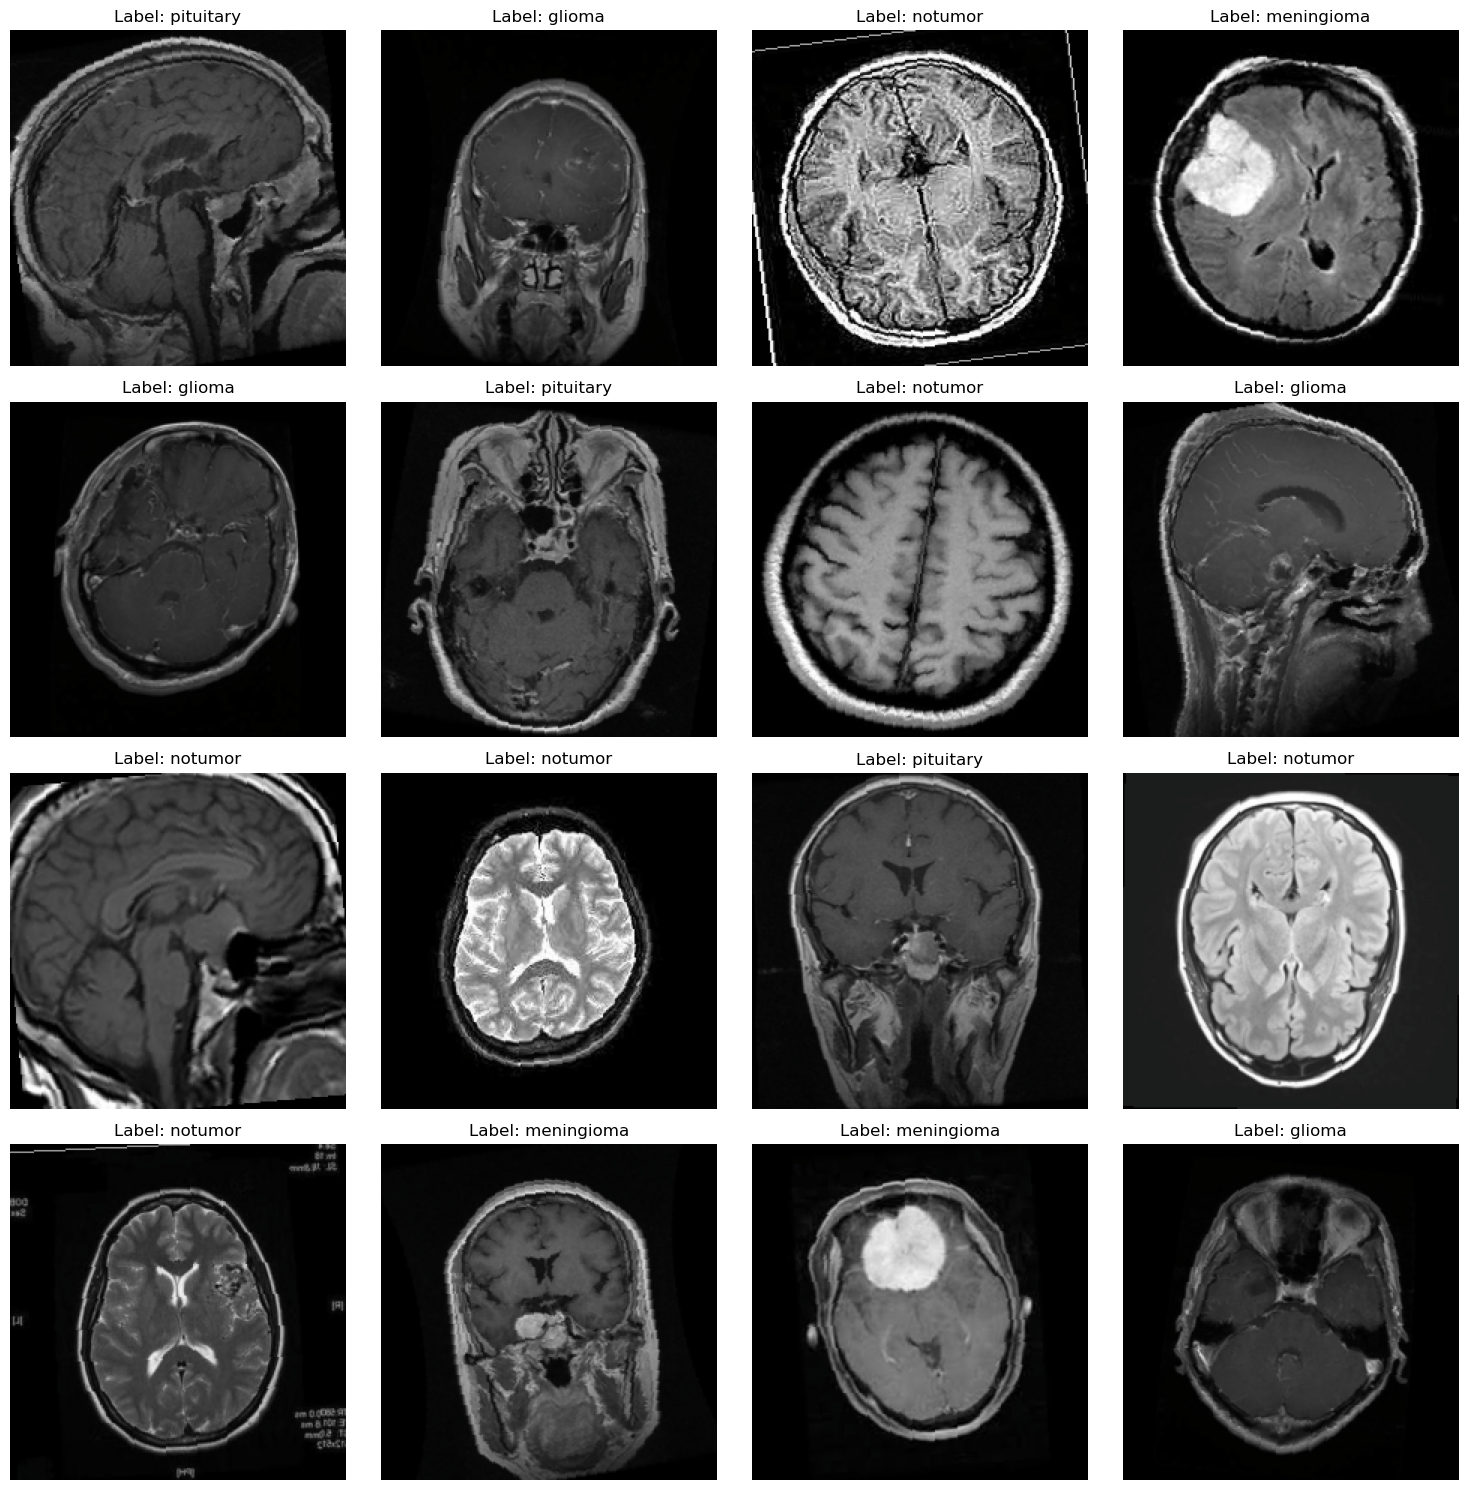

In [4]:
# Convertir imágenes a arreglos de números y normalizar
mean = np.array([0.485, 0.456, 0.406])
std = np.array([0.229, 0.224, 0.225])
images = (images.numpy().transpose((0, 2, 3, 1)) * std + mean).clip(0, 1)

# Crear un grid de imágenes
num_images = len(images)
rows = int(np.ceil(num_images / 4))
fig, axes = plt.subplots(rows, 4, figsize=(15, 15))

# Graficar imágenes junto a su 
for i, ax in enumerate(axes.flat):
    if i < num_images:
        ax.imshow(images[i])
        ax.set_title(f'Label: {train_dataset.classes[labels[i]]}')
    ax.axis('off')

plt.tight_layout()
plt.show()

### MLP (Perceptrón Multicapa)

Es la arquitectura más simple de redes neuronales artificiales. Representa de manera sencilla los 3 tipos de capas que conforman a las redes neuronales artifuciales:

* **Capa de entrada**: conformada por las neuronas que representan a los valores de entrada ($x_i$)
* **Capa(s) oculta(s)**: conformada por las neuronas $h_i^j$ que reciben la suma de los productos de la capa anterior
* **Capa de salida**: la forma la(s) neurona(s) que representa(n) la predicción por la red neuronal. Es decir la capa al final de la arquitectura

<figure>
<img    src="images/MLP.png"
        width="500"
        height="500" />
<figcaption> Fig. 10: Representación gráfica de un MLP.

#### Ejemplo de aplicación de un perceptrón multicapa

In [5]:
# Recuperamos las dimensiones de las imágenes
for batch_idx, (X, y) in enumerate(train_dataset):
    print(X, y)
    break

tensor([[[-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         ...,
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179]],

        [[-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         ...,
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357]],

        [[-1.8044, -1.8044, -1.8044,  ..., -1.8044, -1.8044, -1.8044],
         [-1.8044, -1.8044, -1.8044,  ..., -1

In [6]:
# Construcción del modelo
class MLP(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(224*224*3, 512),
            nn.ReLU(),
            nn.Linear(512,256),
            nn.ReLU(),
            nn.Linear(256,128),
            nn.ReLU(),
            nn.Linear(128, 4),
        )
    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

In [7]:
# Crear un objeto que contenga el modelo
mlp_model = MLP().to(device)
print(mlp_model)

MLP(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=150528, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=256, bias=True)
    (3): ReLU()
    (4): Linear(in_features=256, out_features=128, bias=True)
    (5): ReLU()
    (6): Linear(in_features=128, out_features=4, bias=True)
  )
)


In [8]:
# Función de entrenamiento
def train(model, dataloader, loss_fn, optimizer):
    size = len(dataloader.dataset)
    model.train() # Configuramos el modelo para que aprenda
    for batch, (X, y) in enumerate(dataloader):
        X, y = X.to(device), y.to(device)

        # Hacer una predicción y calcular el error
        pred = model(X)
        loss = loss_fn(pred, y)

        # Backpropagation
        loss.backward() # Cálculo de gradientes
        optimizer.step() # Actualización de los parámetros del modelo
        optimizer.zero_grad()

        if batch % 100 == 0:
            loss, current = loss.item(), (batch + 1) * len(X)
            print(f"Pérdida: {loss:>7f} [{current:>5d}/{size:>5d}]")

In [9]:
# Función de prueba
def test(model, dataloader, loss_fn, losses, accuracies):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    model.eval() # Configuramos el modelo para que no actualice sus parámetros
    test_loss, correct = 0, 0

    with torch.no_grad():
        for X, y in dataloader:
            X, y = X.to(device), y.to(device)
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()
    test_loss /= num_batches
    correct /= size
    losses.append(test_loss)
    accuracies.append(correct)
    print(f"Error de test: \n Precisión: {(100*correct):>0.1f}%, Pérdida promedio: {test_loss:>8f} \n")

In [10]:
# Definición de número de épocas, función de pérdida, y tasa de aprendizaje 
epochs = 10
loss_fn = nn.CrossEntropyLoss()
learning_rate = 0.005
optimizer = torch.optim.SGD(mlp_model.parameters(), lr = learning_rate)

In [11]:
# Guardaremos los valores de pérdida y precisión
mlp_losses = []
mlp_accuracies = []

In [12]:
# Inicio del ciclo de entrenamiento
for t in range(epochs):
    print(f"Época {t+1}\n-------------------------------")
    train(mlp_model, train_loader, loss_fn, optimizer)
    test(mlp_model, val_loader, loss_fn, mlp_losses, mlp_accuracies)
print("Entrenamiento terminado!")

Época 1
-------------------------------
Pérdida: 1.379053 [   16/ 5722]
Pérdida: 0.946913 [ 1616/ 5722]
Pérdida: 0.381052 [ 3216/ 5722]
Pérdida: 1.120337 [ 4816/ 5722]
Error de test: 
 Precisión: 64.3%, Pérdida promedio: 0.865225 

Época 2
-------------------------------
Pérdida: 0.870680 [   16/ 5722]
Pérdida: 0.795886 [ 1616/ 5722]
Pérdida: 0.576780 [ 3216/ 5722]
Pérdida: 0.797151 [ 4816/ 5722]
Error de test: 
 Precisión: 65.9%, Pérdida promedio: 0.865782 

Época 3
-------------------------------
Pérdida: 0.441533 [   16/ 5722]
Pérdida: 0.687412 [ 1616/ 5722]
Pérdida: 0.801308 [ 3216/ 5722]
Pérdida: 0.685905 [ 4816/ 5722]
Error de test: 
 Precisión: 57.2%, Pérdida promedio: 0.954669 

Época 4
-------------------------------
Pérdida: 1.012189 [   16/ 5722]
Pérdida: 0.440628 [ 1616/ 5722]
Pérdida: 0.724087 [ 3216/ 5722]
Pérdida: 0.602600 [ 4816/ 5722]
Error de test: 
 Precisión: 73.0%, Pérdida promedio: 0.650924 

Época 5
-------------------------------
Pérdida: 0.303537 [   16/ 5722]


### CNN

Son redes neuronales que emplean la operación conocida como **convolución** en al menos una de sus capas para procesar los datos de entrada. Son utilizadas generalmente en el campo de la **visión computacional**. Son las más usadas en el ramo de la imagenología médica debido a su gran capacidad de abstraer características complejas dentro de imágenes.

La convolución es una operación matemática que involucra el uso de un kernel (o filtro) con los datos de entrada de tal forma que en una dimensión se vería de la siguiente manera:

<figure>
<img    src="images/Conv1.png"
        width="570"
        height="500">
<figcaption> Fig. 11: Operación de convolución en 1D.
</figure>

#### Ejemplo de aplicación de una CNN
Ejemplo extraído de [Abdallah Waigh en Kaggle](https://www.kaggle.com/code/abdallahwagih/brain-tumor-classification-pytorch) (Waigh, A., 2023)

In [17]:
# Definición del modelo
class TumorClassifier(nn.Module):
    def __init__(self, num_classes):
        super(TumorClassifier, self).__init__()
        self.features = nn.Sequential(
            nn.Conv2d(3, 16, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(16, 32, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )
        self.classifier = nn.Sequential(
            nn.Linear(32 * 56 * 56, 128),
            nn.ReLU(inplace=True),
            nn.Linear(128, num_classes)
        )

    def forward(self, x):
        x = self.features(x)
        x = x.view(x.size(0), -1)
        x = self.classifier(x)
        return x

cnn_model = TumorClassifier(num_classes=4)

cnn_model.to(device)

TumorClassifier(
  (features): Sequential(
    (0): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Linear(in_features=100352, out_features=128, bias=True)
    (1): ReLU(inplace=True)
    (2): Linear(in_features=128, out_features=4, bias=True)
  )
)

In [18]:
# Definir función de pérdida y optimizador
loss_fn = nn.CrossEntropyLoss()
learning_rate = 0.001
optimizer = optim.Adam(cnn_model.parameters(), lr=learning_rate)

##### Entrenamiento del modelo

In [19]:
# Guardaremos los valores de pérdida y precisión
cnn_losses = []
cnn_accuracies = []

In [20]:
# Inicio del ciclo de entrenamiento
for t in range(epochs):
    print(f"Época {t+1}\n-------------------------------")
    train(cnn_model, train_loader, loss_fn, optimizer)
    test(cnn_model, val_loader, loss_fn, cnn_losses, cnn_accuracies)
print("Entrenamiento terminado!")

Época 1
-------------------------------
Pérdida: 1.388344 [   16/ 5722]
Pérdida: 0.584103 [ 1616/ 5722]
Pérdida: 0.418171 [ 3216/ 5722]
Pérdida: 0.714893 [ 4816/ 5722]
Error de test: 
 Precisión: 80.5%, Pérdida promedio: 0.496290 

Época 2
-------------------------------
Pérdida: 0.458808 [   16/ 5722]
Pérdida: 0.509873 [ 1616/ 5722]
Pérdida: 0.377945 [ 3216/ 5722]
Pérdida: 0.265014 [ 4816/ 5722]
Error de test: 
 Precisión: 87.2%, Pérdida promedio: 0.334623 

Época 3
-------------------------------
Pérdida: 0.227599 [   16/ 5722]
Pérdida: 0.219232 [ 1616/ 5722]
Pérdida: 0.376398 [ 3216/ 5722]
Pérdida: 0.130675 [ 4816/ 5722]
Error de test: 
 Precisión: 89.3%, Pérdida promedio: 0.322091 

Época 4
-------------------------------
Pérdida: 0.431782 [   16/ 5722]
Pérdida: 0.110722 [ 1616/ 5722]
Pérdida: 0.322279 [ 3216/ 5722]
Pérdida: 0.303029 [ 4816/ 5722]
Error de test: 
 Precisión: 91.9%, Pérdida promedio: 0.207945 

Época 5
-------------------------------
Pérdida: 0.048893 [   16/ 5722]


##### Evaluación de los modelos

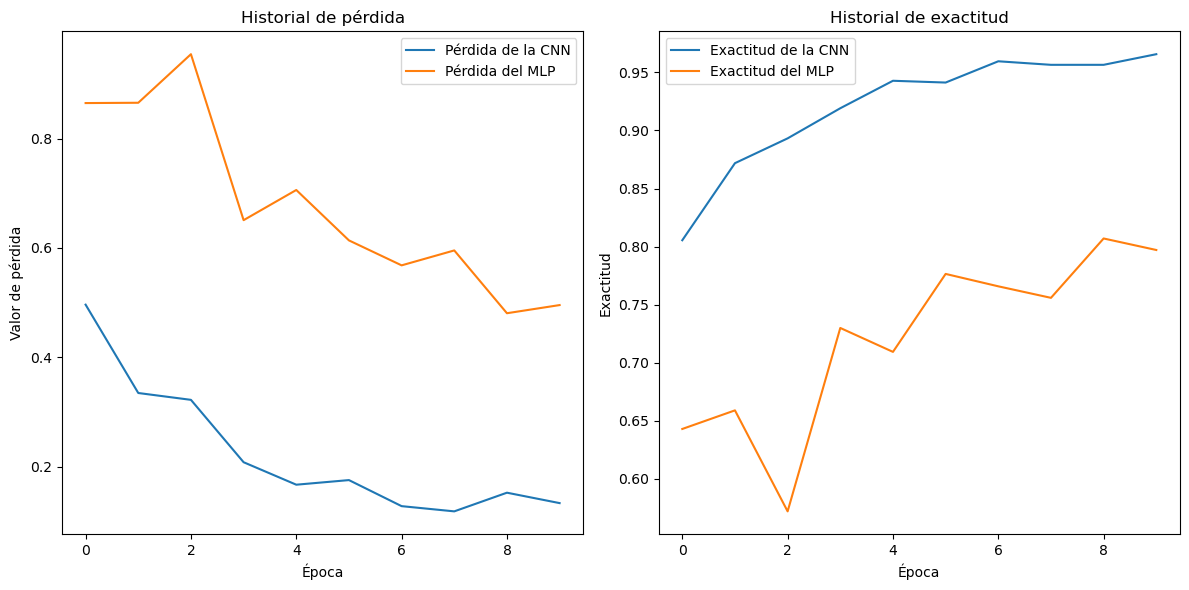

In [21]:
# Visualizar progreso del modelo durante el entrenamiento
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(cnn_losses, label='Pérdida de la CNN')
plt.plot(mlp_losses, label='Pérdida del MLP')
plt.xlabel('Época')
plt.ylabel('Valor de pérdida')
plt.legend()
plt.title('Historial de pérdida')

plt.subplot(1, 2, 2)
plt.plot(cnn_accuracies, label='Exactitud de la CNN')
plt.plot(mlp_accuracies, label='Exactitud del MLP')
plt.xlabel('Época')
plt.ylabel('Exactitud')
plt.legend()
plt.title('Historial de exactitud')

plt.tight_layout()
plt.show()

### RNN
**RNN** son las siglas de *Recurrent Neural Network*, que se traduce a Redes Neuronales Recurrentes. Estas emplean la **reincidencia** de los datos para generar predicciones, es decir, se utiliza la información procesada por un estado oculto anterior a manera de retroalimentación para generar predicciones nuevas.

En este caso los *estados ocultos* se encuentran en las *capas ocultas* de la red neuronal y en la literatura son comúnmente denotadas como $h^t$. También se les refiere como a una clase de **memoria**.

A continuación se muestra un diagrama que representa la arquitectura básica de las RNNs.

<figure>
<img    src="images/RNN_unfolded_output_to_hidden.png"
        width="600"
        height="400">
<figcaption> Fig. 12: Ilustración de una arquitectura básica de RNN.
</figure>

### Transformadores

Los *transformers* fueron la revolución del área de *procesamiento de lenguaje natural* en tareas de traducción y generación de texto cuando fueron introducidos por Vaswani y sus colaboradores en 2017. Se deshicieron de cualquier operación de convolución o de retroalimentación de la información en las redes neuronales, reemplazándolos por **procesos atencionales**. Estas arquitecturas *que ya prestaban atención* entre los valores de entrada y su relación con los valores de salida, sentaron las bases de las inteligencias artificiales más avanzadas, ejemplo de ello es el conocido ChatGPT.

La siguiente figura ilustra la arquitectura general de los transformadores:

<figure>
<img    src="images/Transformer.png"
        width=600
        height=800>
        <figcaption> Fig. 13: Arquitectura básica de los transformadores (Vaswani, et al., 2017). 
</figure>


## Métricas de evaluación de modelos

### Exactitud (*Accuracy*)

Es una medida que informa acerca del número de **clasificaciones correctas** del número total de clasificaciones hechas por el modelo . Su valor es representado mediante porcentajes que van del 0 al 100%.

<img src="images/accuracy.png" width=512, height=512>

### Sensibilidad

La especificidad es la verdadera tasa negativa de una prueba. En otras palabras, representa la proporción de personas sin la enfermedad, que tendrá un resultado negativo. Al igual que para la sensibilidad, los valores oscilan entre 0 y 100%.

<img src="images/false-positive-blog-image-ss1-1024x512.png"
width=512
height=300>

### Especificidad

Es la tasa de positividad verdadera de una prueba. Es decir, cuántos sujetos con una enfermedad son realmente identificados como portadores de la enfermedad por la prueba. Los valores oscilan entre 0 y 100%. Se calcula de la siguiente forma: 
$$Especificidad = \frac{Verdaderos\ negativos}{Verdaderos\ negativos + Falsos\ positivos}$$

### Precisión

Es una medida que nos dice de todos los casos previstos, cuántos son casos reales. Rango de valores posibles de 0 a 1.

$$Precisión = \frac{Verdaderos\ positivos}{Verdaderos\ Positivos + Falsos\ Positivos}$$

### Matriz de confusión
<figure>
<img    src="images/Confusion_matrix.png"
        width=710
        height=600>
</figure>

### *Recall*
Es una medida informativa que indica el número de *casos* identificados por el modelo con respecto del número de *casos* real. Por ejemplo, una pregunta que el *recall* responde es: "Del número total de pacientes con cáncer, ¿cuántos fueron correctamente identificados por el modelo?".

### Curva ROC (*Area under the receiver operator curve*)

Es una medida que detalla qué tan sensible y específico es el modelo. Normalmente se detalla en una gráfica en donde el eje $x$ representa las predicciones erróneas, y el $y$ las positivas. Una métrica mala en términos de sensitividad y especificidad se encontraría por debajo de una valor de 0.5. Análogamente, sería como tirar un volado.

<img src="images/AUCROC.webp"
width=620, height=480>

## Aprendizaje supervisado, no supervisado y reforzado

Son las dos principales clases en las que se clasifica el aprendizaje automático.

El **aprendizaje supervisado** consiste en un aprendizaje en donde el modelo aprende a mapear las entradas hacia una salida predefinida (etiquetas) con base en el ajuste continuo de sus parámetros. El **aprendizaje no supervisado** no cuenta con ningún tipo de identificador o etiqueta, sino que se encargan de encontrar estructuras o patrones inherentes a los datos de entrada.

### t-SNE

La "incrustación de vecinos estócasticos distribuidos en T es una tecnica de reduccion de dimensionalidad no lienal para "incrustar" datos de alta dimansión para su visualización en otro de baja dimensión. Pertenece a la familia de algoritmos de aprendizaje semi-supervisado.

Encuentra patrones basados en la similitud de las características con la "probabilidad condicional". Minimiza la diferencia entre estas probabilidades. Aprovecha tanto los datos etiquetados como los no etiquetados durante el entrenamiento.

### PCA

* Es una técnica utilizada en análisis multivariante y aprendizaje automático para reducir la dimensionalidad de un conjunto de datos, manteniendo al mismo tiempo la mayor cantidad posible de información.
* Se calcula la matriz de covarianza de los datos originales.
* La covarianza es una medida de cómo varían dos variables juntas. La matriz de covarianza muestra cómo cada variable en el conjunto de datos se relaciona con todas las demás variables para después hacer un calculo de componentes principales para despues proyectarlos en un espacio de menor dimensión
* Técnica útil para reducir la dimensionalidad de los datos mientras se conserva la mayor cantidad posible de información.

A continuación una ilustración de resultados clasificados mediante métodos de aprendizaje no supervisado:

<figure>
<img src="images/UMAP_down.png"
width=850, height=800>
<figcaption> Fig. 14: Agrupamiento de tipos celulares cerebrales con base en su información transcriptómica mediante modelos de aprendizaje no supervisado.
</figure>

# Casos de éxito
---
Algunos modelos que han sido puestos en práctica y lanzados para su uso masivo en el área de la salud:

## IBM Watson for Oncology

Software desarrollado por la compañía IBM capaz de analizar el significado y contexto de datos clínicos como notas y reportes escritos en inglés. Enriquecido con el archivo de pacientes y expertiz clínico del *Memorial Sloan Kettering*, **Watson for Oncology** identifica y categoriza planes y opciones de tratamiento. 

Algunas de sus principales características son: 
* Analiza los datso del paciente y los compara contra miles de casos históricos y retroalimentación obtenida del personal médico del *Memorial Sloan Kettering Cancer Center*
* Evoluciona continuamente gracias a sus reentrenamientos periódicos
* Es un recurso de primer acercamiento para casos de mama, pulmón, colon y recto

Más información acerca de este modelo [aquí](https://www.ibm.com/docs/en/announcements/watson-oncology?region=CAN)

## Google DeepMind's AI for Retinal Disease
La subsidiaria de Google, **Deep Mind**, desarrolló una IA capaz de realizar análisis retinales para detección de enfermadades tales como retinopatía diabética, y degeneración macular degenerativa.
Más acerca de esta historia en este [link](https://about.google/stories/seeingpotential/).

## Alpha Fold 
Otra tecnología desarrollada por **DeepMind** que predice la estructura y organización tridimensional de proteínas con base en la secuencia de aminoácidos que la componen. 

Esta tecnología tiene el potencial de revolucionar el campo de la biología estructural y en el descubrimiento de fármacos gracias a que sus predicciones confiables permiten entender el funcionamiento de proteínas y su interacción con otras sustencias. Es posible realizar prubeas de manera gratuita, y obtener más información en este [enlace](https://alphafold.ebi.ac.uk).

# Comprendiendo el proceso
---

1. Recopilación de datos.

Este paso es crucial para que la red neuronal o la alrquitectura pueda aprender con los resultados esperados. Una buena **elección** y cantidad dentro de la base de datos, disminuirá el sesgo estadistíco o el margen de error.

2. Preparación de nuestros datos.

Nos referimos a que los datos van a pasar por un proceso dónde se identifican y manejan los problemas en los datos, como valores faltantes, valores atípicos o datos inconsistentes. Algunas técnicas comunes incluyen imputación de valores faltantes, eliminación de duplicados y normalización de datos.

3. ¡Hora de elegir el modelo!

En esta parte del proceso, se va a elegir el modelo que mejor nos vaya a funcionar, en nuestro caso los clasificadores o el analisis de componentes principales serían una buena opción.

4. Entrenar al modelo.

Una vez elegido el modelo, llegamos a la etapa de entrenamiento con los datos pre-procesados. También se seleccionan los **hiperparámetros**, que son especificaciones de la estructura del modelo y proceso de entrenamiento.

5. Evaluación: ¿Es suficientemente competente?

Se realiza una serie de pruebas para evaluar si el modelo es óptimo, anteriormente se dividieron los datos en dos conjuntos (en ocasiones tres): de **entrenamiento** y de **prueba**.

6. Modelo listo para *inferencia*

Una vez concluidos los pasos anteriores alcanzado un rendimiento óptimo, el modelo esta listo para empezar a trabajar.

# Laboratorio de Innovación Biodigital
En el Laboratorio de Innovación Biodigital realizamos una amplía gama de experimentos que van desde análisis y ciencia de datos, hasta desarrollo de modelos de machine y deep learning. También hacemos otros tipos de análisis, tales como expresión diferencial, plegamiento y alucinación de proteínas y la evaluación de sus interacciones con otras moléculas de interés farmacéutico. Buscamos desarrollar tecnología y estudios que respondan a preguntas cada vez más locas.
<figure>
<img    src="images/Logo BIL con nombre.png"
        width=400
        height=500>
</figure>

<figure>
<img    src="images/BIL.jpeg"
        width=900
        height=600>
</figure>

## Nuestro LinkedIn
<figure>
<img    src="images/Linkedin_BIL.png"
        width=400
        height=400>
</figure>

# Referencias
---

1. Auslander, N., Gussow, A. B., & Koonin, E. V. (2021). Incorporating machine learning into established bioinformatics frameworks. International journal of molecular sciences, 22(6), 2903.
2. Mendez, K. M., Reinke, S. N., & Broadhurst, D. I. (2019). A comparative evaluation of the generalised predictive ability of eight machine learning algorithms across ten clinical metabolomics data sets for binary classification. Metabolomics, 15, 1-15.
3. Rauschert, S., Raubenheimer, K., Melton, P. E., & Huang, R. C. (2020). Machine learning and clinical epigenetics: a review of challenges for diagnosis and classification. Clinical , 12, 1-11.
4. Angermueller, C., Pärnamaa, T., Parts, L., & Stegle, O. (2016). Deep learning for computational biology. Molecular systems biology, 12(7), 878.
5. Elkomy, A. (2024) Breast Cancer. Recuperado de https://www.kaggle.com/datasets/adhamelkomy/breast-cancer
6. Waigh, A. (2023) Brain Tumor Classificaction PyTorch. Recuperado de: https://www.kaggle.com/code/abdallahwagih/brain-tumor-classification-pytorch
7. Al-Yasriy (2020) The IQ-OTH/NCCD lung cancer dataset. Recurperado de: https://www.kaggle.com/datasets/hamdallak/the-iqothnccd-lung-cancer-dataset/data